In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [2]:
df = pd.read_csv('gold fund.csv')

In [3]:
df.head()

,ID,Gender,AMB,AccountSince,RelationshipSize,AvgMonthlyTxn,DematAccounts,FD_Nos,MF_nos,Equity_mfs,Debt_mfs,Balanced_Funds,ELSS,PMS_accounts,Trading_Accounts,Speciality_funds,Gold_Fund
0,25,1,297,22,2,14,0,1,1,0,0,0,0,0,0,0,0
1,46,1,138,56,7,22,2,1,2,0,1,0,1,1,0,0,0
2,47,1,228,2,1,2,0,0,0,0,0,0,0,0,0,0,0
3,61,1,190,16,1,16,0,0,0,0,0,0,1,0,0,0,0
4,79,1,187,14,1,14,1,0,0,0,0,0,0,0,0,0,0


In [4]:
#separate the feature and outcome 
x = df.iloc[:,1:-1]
y = df.Gold_Fund

In [5]:
#split the data 
from sklearn.model_selection import train_test_split

In [6]:
x_train,x_test,y_train,y_test   = train_test_split(x,y)

In [7]:
#staderdise the data 
from sklearn.preprocessing import StandardScaler

In [8]:
stdSc = StandardScaler()
stdSc.fit(x_train)

StandardScaler()

In [9]:
x_train_std = stdSc.transform(x_train)
x_test_std = stdSc.transform(x_test)

In [10]:
from keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation

#model = Sequential()

In [15]:
model = Sequential()
#hidden layes 
model.add(Dense(20,activation = 'sigmoid'))
model.add(Dense(20,activation = 'sigmoid'))
#ouput layes
model.add(Dense(1,activation = 'sigmoid'))


In [16]:
model.compile(loss = 'binary_crossentropy',optimizer = 'adam',metrics = ['accuracy'])


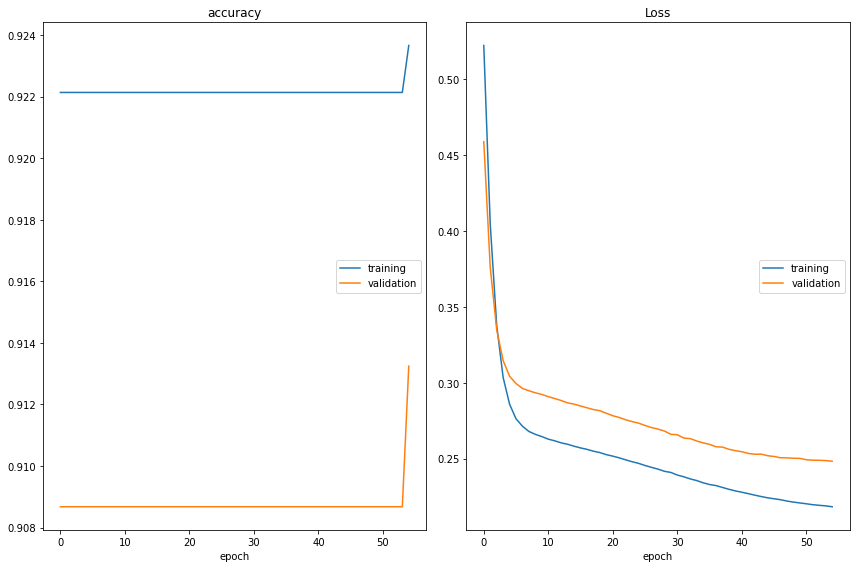

accuracy
	training         	 (min:    0.922, max:    0.924, cur:    0.924)
	validation       	 (min:    0.909, max:    0.913, cur:    0.913)
Loss
	training         	 (min:    0.218, max:    0.522, cur:    0.218)
	validation       	 (min:    0.248, max:    0.459, cur:    0.248)
21/21 [==============================] - 1s 39ms/step - loss: 0.2183 - accuracy: 0.9237 - val_loss: 0.2482 - val_accuracy: 0.9132


In [17]:
from livelossplot import PlotLossesKeras
model.fit(x_train_std,y_train,epochs = 55,callbacks = [PlotLossesKeras()],validation_data = (x_test_std,y_test))


In [14]:
model.summary()
print(x_train.shape)
print(y_train.shape)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 20)                320       
_________________________________________________________________
dense_1 (Dense)              (None, 20)                420       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 21        
Total params: 761
Trainable params: 761
Non-trainable params: 0
_________________________________________________________________
(655, 15)
(655,)
